# Hotel Reviews Classification

## Project      :    P36 
### Group          :   G3 - The Blackholes
#### Team Drivers : Pooja , Manthan , Ashish , Alok , Shakila 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

### Importing Basic Python libraries

In [12]:
import numpy as np # for numerical calculations, mathematical functions
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt
import seaborn as sns

### Importing libraries for text preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

### Loading the dataset

In [13]:
data = pd.read_csv("E:\\1 P36 PROJECT\\Original Datasets\\train (2).csv")
# data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\train.csv")

### EDA - Exploratory Data Analysis

In [3]:
data.head(3)
data.tail(3)

,ID,Review,Rating
0,0,exceptional service nice all-around daughter s...,5
1,1,beautiful relaxing jw marriott desert ridge re...,5
2,2,great location great location 5 mins subway ta...,5


,ID,Review,Rating
14340,14340,great place relax know looking vacation book t...,4
14341,14341,"better just got week seattle loved minute, pac...",3
14342,14342,"stay clear, internet reservation friday rang h...",1


In [15]:
data.shape
# there are about 14000 reviews and 3 columns
data.columns

(14343, 3)

Index(['ID', 'Review', 'Rating'], dtype='object')

In [16]:
data.describe
# data.describe() - can be used only for continuous data

<bound method NDFrame.describe of           ID                                             Review  Rating
0          0  exceptional service nice all-around daughter s...       5
1          1  beautiful relaxing jw marriott desert ridge re...       5
2          2  great location great location 5 mins subway ta...       5
3          3  pleased nice safe hotel, flower market hotel v...       3
4          4  excellent hotel service great hotel excellent ...       4
...      ...                                                ...     ...
14338  14338  hotel madrid hotel perfect, location tiny quie...       5
14339  14339  excellent hotel stay florence hotel chosen tri...       5
14340  14340  great place relax know looking vacation book t...       4
14341  14341  better just got week seattle loved minute, pac...       3
14342  14342  stay clear, internet reservation friday rang h...       1

[14343 rows x 3 columns]>

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      14343 non-null  int64 
 1   Review  14343 non-null  object
 2   Rating  14343 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 336.3+ KB


In [18]:
data.shape

(14343, 3)

#### Checking for duplicate reviews in dataset

In [4]:

new_Reviews = list(set(data.Review)) # removes duplicate reviews
len(new_Reviews) # 14343
# no review has been duplicated

14343

#### Checking for Missing values 

In [20]:
data.isnull().sum()
# no missing values in the data

ID        0
Review    0
Rating    0
dtype: int64

In [21]:
data['Rating'].value_counts()

5    6436
4    4172
3    1510
2    1248
1     977
Name: Rating, dtype: int64

In [22]:
# Calculating Percentage 
data['Rating'].value_counts(normalize=True)*100

5    44.872063
4    29.087360
3    10.527784
2     8.701109
1     6.811685
Name: Rating, dtype: float64

In [23]:
6436+4172
1510
1248+977
44.87+29.09
10.53
8.7 + 6.8

10608

1510

2225

73.96

10.53

15.5

#### Boxplot showing frequency of Ratings

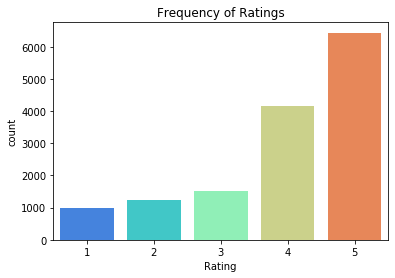

In [24]:
sns.countplot(x='Rating',data=data , palette='rainbow').set_title("Frequency of Ratings");

In [5]:
# finding length of the reviews
data['text length'] = data['Review'].apply(len)
data.head()

,ID,Review,Rating,text length
0,0,exceptional service nice all-around daughter s...,5,937
1,1,beautiful relaxing jw marriott desert ridge re...,5,791
2,2,great location great location 5 mins subway ta...,5,473
3,3,"pleased nice safe hotel, flower market hotel v...",3,342
4,4,excellent hotel service great hotel excellent ...,4,244


In [17]:
a= 'the jupyter notebook'
len(a) # gives length of words

20

#### Finding max and min length of reviews

In [10]:
data['text length'].max() # the largest review has  13501 words
data['text length'].min() # min smallest has 44 words
# data.describe() # to find max and min of text length

13501

44

### Creating 3 classes from 5 Ratings

In [18]:
data['label_review'] = None
for index, rows in data.iterrows():
    if(rows['Rating'] >= 1 and rows['Rating'] < 3):
        data.at[index, 'label_review'] = 'Negative'
    elif(rows['Rating'] == 3):
        data.at[index,'label_review'] = 'Neutral'
    elif(rows['Rating'] > 3 and rows['Rating'] <= 5 ):
        data.at[index,'label_review'] = 'Positive'
data

,ID,Review,Rating,label_review
0,0,exceptional service nice all-around daughter s...,5,Positive
1,1,beautiful relaxing jw marriott desert ridge re...,5,Positive
2,2,great location great location 5 mins subway ta...,5,Positive
3,3,"pleased nice safe hotel, flower market hotel v...",3,Neutral
4,4,excellent hotel service great hotel excellent ...,4,Positive
...,...,...,...,...
14338,14338,"hotel madrid hotel perfect, location tiny quie...",5,Positive
14339,14339,excellent hotel stay florence hotel chosen tri...,5,Positive
14340,14340,great place relax know looking vacation book t...,4,Positive
14341,14341,"better just got week seattle loved minute, pac...",3,Neutral


In [19]:
# finding proportion of positive, neutral and negative reviews
data.label_review.value_counts(normalize=True)*100
data.label_review.value_counts()

Positive    73.959423
Negative    15.512794
Neutral     10.527784
Name: label_review, dtype: float64

Positive    10608
Negative     2225
Neutral      1510
Name: label_review, dtype: int64

## Text Preprocessing

In [21]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 
from nltk.stem.porter import PorterStemmer # for stemming of words
from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatixe the words
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","n","th","hotel","room"]
stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', row['Review'])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    data.at[index, 'clean_review'] = text
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

,ID,Review,Rating,label_review,clean_review
0,0,exceptional service nice all-around daughter s...,5,Positive,exceptional service nice around daughter staye...
1,1,beautiful relaxing jw marriott desert ridge re...,5,Positive,beautiful relaxing jw marriott desert ridge re...
2,2,great location great location 5 mins subway ta...,5,Positive,great location great location min subway take ...
3,3,"pleased nice safe hotel, flower market hotel v...",3,Neutral,pleased nice safe flower market vast array res...
4,4,excellent hotel service great hotel excellent ...,4,Positive,excellent service great excellent location cou...
...,...,...,...,...,...
14338,14338,"hotel madrid hotel perfect, location tiny quie...",5,Positive,madrid perfect location tiny quiet street cent...
14339,14339,excellent hotel stay florence hotel chosen tri...,5,Positive,excellent stay florence chosen tripadviser bes...
14340,14340,great place relax know looking vacation book t...,4,Positive,great place relax know looking vacation book t...
14341,14341,"better just got week seattle loved minute, pac...",3,Neutral,better got week seattle loved minute pacific p...


In [22]:
from nltk.tokenize import word_tokenize
corpusdata=data['clean_review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

(14343, 14343)

In [23]:
corpusdata = np.asarray(corpusdata)
targets = np.asarray(data['Rating'].tolist())

In [24]:

corpus1 = data[data['Rating'] == 1]['clean_review'].apply(word_tokenize).tolist()
corpus2 = data[data['Rating'] == 2]['clean_review'].apply(word_tokenize).tolist()
corpus3 = data[data['Rating'] == 3]['clean_review'].apply(word_tokenize).tolist()
corpus4 = data[data['Rating'] == 4]['clean_review'].apply(word_tokenize).tolist()
corpus5 = data[data['Rating'] == 5]['clean_review'].apply(word_tokenize).tolist()

## Generating N-GRAMS

In [29]:
def count_ngrams(corpusdata, n=2, ntop=None):
    ngrams = {}
    
    for clean_review in corpusdata:
        clean_review = tuple(clean_review)
        
        for i in range(0, len(clean_review) - n + 1): 
                # Get the n-gram from i to i+n
                ngram = clean_review[i:i+n]
                
                # check if the n-gram is in the dictionary
                if ngram in ngrams:
                    # Increment the count for this n-gram
                    ngrams[ngram] += 1
                else:
                    # Initialize this n-gram count to 1
                    ngrams[ngram] = 1
                    
    ngrams = pd.DataFrame.from_dict(ngrams, orient='index', columns=['count']).sort_values('count', ascending=False)
    
    ngrams.reset_index(inplace=True)
    
    ngrams['index'] = ngrams['index'].str.join(', ')
    
    
    if (ntop):
        ngrams = ngrams[:ntop]    
        
    return ngrams

### Plot Unigram

In [30]:
uni_grams1 = count_ngrams(corpus1, n=1, ntop=10)
uni_grams2 = count_ngrams(corpus2, n=1,ntop=10)
uni_grams3 = count_ngrams(corpus3, n=1,ntop=10)
uni_grams4 = count_ngrams(corpus4, n=1,ntop=10)
uni_grams5 = count_ngrams(corpus5, n=1,ntop=10)

uni_grams1['Rating'] = 1
uni_grams2['Rating'] = 2
uni_grams3['Rating'] = 3
uni_grams4['Rating'] = 4
uni_grams5['Rating'] = 5

unigrams = pd.concat([uni_grams5, uni_grams4, uni_grams3, uni_grams2, uni_grams1])

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='last_expr'

In [33]:
import plotly.express as px
from plotly.subplots import make_subplots
fig = px.bar(unigrams, x="index", y="count", color="Rating", facet_col="Rating", title='Unigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Plot Bi-GRAMS

In [34]:

bi_grams1 = count_ngrams(corpus1,n=2,ntop=10)
bi_grams2 = count_ngrams(corpus2, n=2,ntop=10)
bi_grams3 = count_ngrams(corpus3, n=2,ntop=10)
bi_grams4 = count_ngrams(corpus4, n=2,ntop=10)
bi_grams5 = count_ngrams(corpus5, n=2,ntop=10)

bi_grams1['Rating'] = 1
bi_grams2['Rating'] = 2
bi_grams3['Rating'] = 3
bi_grams4['Rating'] = 4
bi_grams5['Rating'] = 5

bigrams = pd.concat([bi_grams5, bi_grams4, bi_grams3, bi_grams2, bi_grams1])

In [35]:

fig = px.bar(bigrams, x="index", y="count", color="Rating", facet_col="Rating",  title='Bigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Plot TRI-GRAMS

In [36]:

tri_grams1 = count_ngrams(corpus1, n=3, ntop=10)
tri_grams2 = count_ngrams(corpus2, n=3, ntop=10)
tri_grams3 = count_ngrams(corpus3, n=3, ntop=10)
tri_grams4 = count_ngrams(corpus4, n=3, ntop=10)
tri_grams5 = count_ngrams(corpus5, n=3, ntop=10)

tri_grams1['Rating'] = 1
tri_grams2['Rating'] = 2
tri_grams3['Rating'] = 3
tri_grams4['Rating'] = 4
tri_grams5['Rating'] = 5

tri_grams = pd.concat([tri_grams5, tri_grams4, tri_grams3, tri_grams2, tri_grams1])

In [37]:
fig = px.bar(tri_grams, x="index", y="count", color="Rating", facet_col="Rating", title='Trigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

### PLOTTING WORD-CLOUD for UNIGRAMS AS PER RATINGS

In [38]:
from wordcloud import WordCloud
stops = stopwords.words('english') 

w1 = WordCloud(color_func=lambda *args, **kwargs: "#EF553B", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 1]['clean_review']))

w2 = WordCloud(color_func=lambda *args, **kwargs: "#FFA15A", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 2]['clean_review']))

w3 = WordCloud(color_func=lambda *args, **kwargs: "#FECB52", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 3]['clean_review']))

w4 = WordCloud(color_func=lambda *args, **kwargs: "#B6E880", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 4]['clean_review']))

w5 = WordCloud(color_func=lambda *args, **kwargs: "#00CC96", 
               background_color='white', 
               max_words=50,
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 5]['clean_review']))

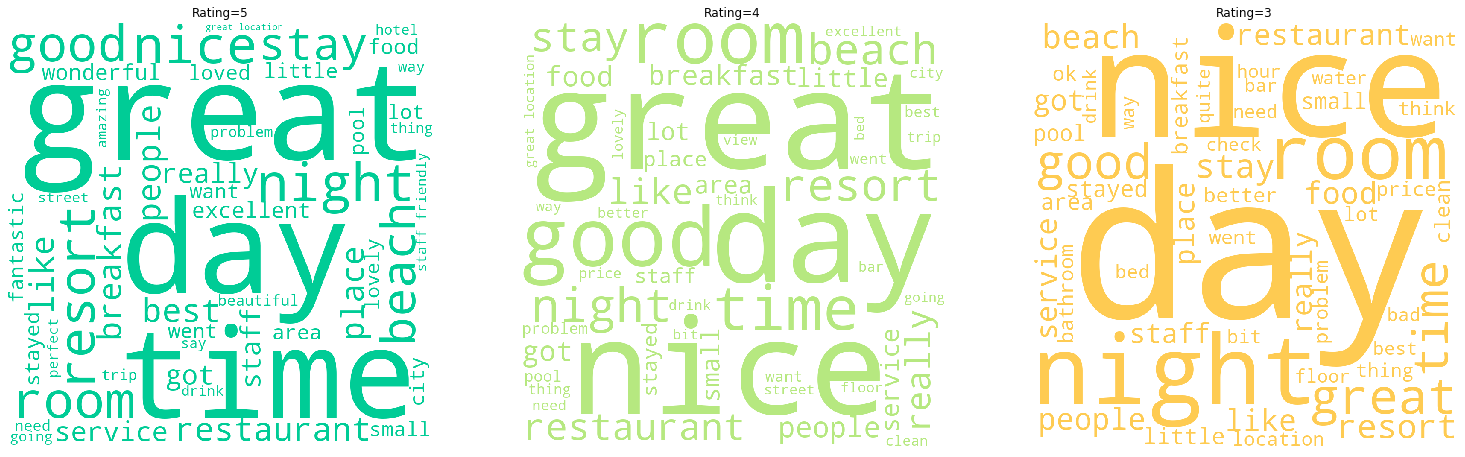

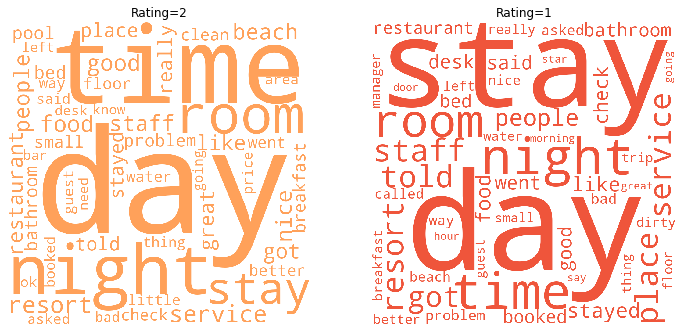

In [71]:
fig = plt.figure(figsize=(26, 12))

fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.title('Rating=5')
plt.imshow(w5)

fig.add_subplot(1, 3, 2)
plt.title('Rating=4')
plt.axis('off')
plt.imshow(w4)

fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.title('Rating=3')
plt.imshow(w3)

fig = plt.figure(figsize=(12, 8))


fig.add_subplot(1, 2, 1)
plt.title('Rating=2')
plt.axis('off')
plt.imshow(w2)

fig.add_subplot(1, 2, 2)
plt.title('Rating=1')
plt.axis('off')
plt.imshow(w1);

In [39]:
#############################